In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df  = sns.load_dataset("titanic")

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Null values heatmap
Using a heat map to visualise the missing values in each column.
Data has a number of values missing in the Age and deck column. Shall delete the entire "deck" column and two missing values in the "Embark_town & embarked" column since the column has no significant impact on the analysis and shall fill in the missing values in the Age column after consideration of other factors laid down below

<AxesSubplot:>

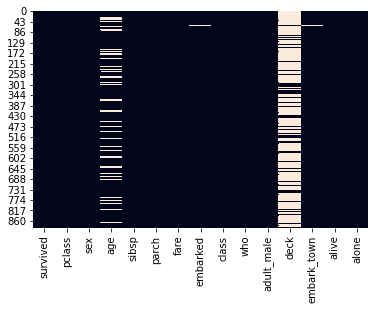

In [5]:
sns.heatmap(df.isna(),cbar=False)

In [6]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.drop(columns=["deck"],inplace=True)

## Dataframes for each surviving and non-surviving class with respect to sex

In [8]:
Male_survived = df[(df["survived"]==1) & (df["sex"]=="male")] 

In [9]:
Female_survived = df[(df["survived"]==1) & (df["sex"]=="female")] 

In [10]:
Unsurvived_females = df[(df["survived"]==0)&(df["sex"]=="female")]

In [11]:
Unsurvived_males = df[(df["survived"]==0)&(df["sex"]=="male")]

### Gender and Age distribution of surviving individuals.
1)The plots show that most of the surviving individuals were of 20-40years with the survival of Females to be higher than that of males.

2)There is a higher chance of survival for babies within the age range of 0-5years.


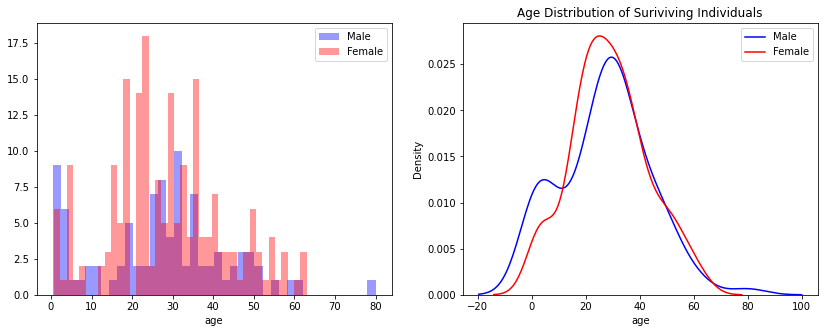

In [12]:
plt.figure(figsize=[14,5])
plt.subplot(1,2,1)
sns.distplot(Male_survived.age,color="blue",kde=False,bins=40,label="Male")
sns.distplot(Female_survived.age,color="red",kde=False,bins=40,label="Female")
plt.legend()
plt.subplot(1,2,2)
sns.kdeplot(Male_survived.age,color="blue",label="Male")
sns.kdeplot(Female_survived.age,color="red",label="Female")
plt.title("Age Distribution of Suriviving Individuals")
plt.legend()
plt.show()

## Median Age of all passengers
Replaced the missing ages in the "Age" column with the median age.


In [13]:
df.age.fillna(df.age.median(),inplace=True)

In [14]:
df.dropna(axis=0,inplace=True)

## Updated heatmap of dataframe

Heatmap confirms that all missing values have been replaced/deleted after careful consideration

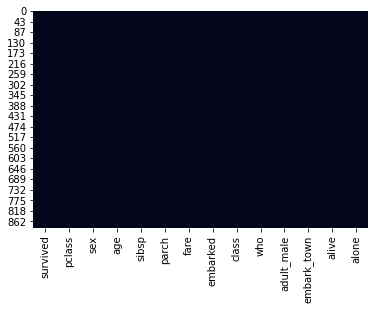

In [15]:
sns.heatmap(df.isna(),cbar=False)
plt.show()

In [16]:
Total_survivors = df[df["survived"]==1]

In [17]:
Total_Non_survived = df[df["survived"]==0]

## Survivors/ Non Survivors per "Pclass"
Most Survivors were from the "1st Pclass". With the female sex having a higher probability of survival.

Most non-survivors were from the "3rd Pclass".


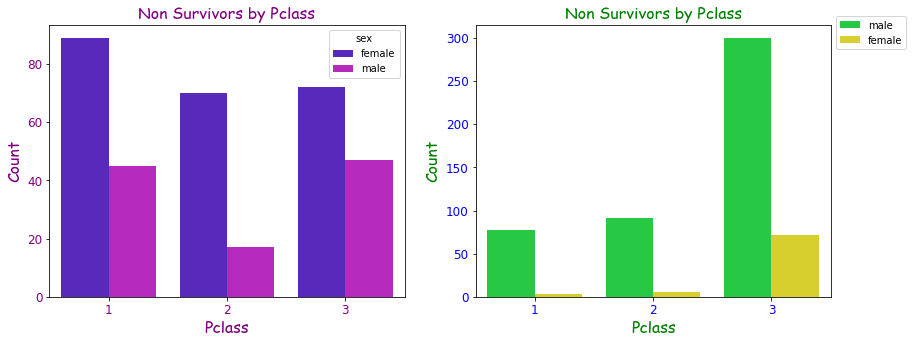

Total_survivors           Total_Non_survived          
sex             female male  All             female male  All
pclass                                                       
1                   89   45  134                  3   77   80
2                   70   17   87                  6   91   97
3                   72   47  119                 72  300  372
All                231  109  340                 81  468  549

In [18]:
plt.figure(figsize=[14,5])
plt.subplot(1,2,1)
sns.countplot(data=Total_survivors,x="pclass",hue="sex",color="blue",palette=["#5110D4","#CB10D4"])
plt.title("Non Survivors by Pclass",fontdict={"fontname":"Comic Sans MS","fontsize":16,"color":"purple"})
plt.xlabel("Pclass",fontdict={"fontname":"Comic Sans MS","fontsize":16,"color":"purple"})
plt.tick_params(axis="both",labelsize="large",labelcolor="purple")
plt.ylabel("Count", fontdict={"fontname":"Comic Sans MS","fontsize":16,"color":"purple"})
plt.subplot(1,2,2)
sns.countplot(data=Total_Non_survived,x="pclass",hue="sex",color="green",palette=["#0CE433","#F3E912"])
plt.legend(bbox_to_anchor=(1, 1.05))
plt.title("Non Survivors by Pclass",fontdict={"fontname":"Comic Sans MS","fontsize":16,"color":"green"})
plt.xlabel("Pclass",fontdict={"fontname":"Comic Sans MS","fontsize":16,"color":"green"})
plt.tick_params(axis="both",labelsize="large",labelcolor="blue")
plt.ylabel("Count", fontdict={"fontname":"Comic Sans MS","fontsize":16,"color":"green"})
plt.show()

Keys = ["Total_survivors","Total_Non_survived"]

pd.concat([pd.crosstab(Total_survivors.pclass,Total_survivors.sex,margins=True),pd.crosstab(Total_Non_survived.pclass,Total_Non_survived.sex,margins=True,)],axis=1,keys=Keys)

## Distribution of surviving/Non surviving age as per embarked town

1)Irrespective of where one boarded the ship, children of age 1-5 had a higher probability of surviving. 

2)Age range of 24-38years individuals also had a higher chance of survival.

###### 3)More generally, there is a higher probability of survival if an individual is NOT an adult.

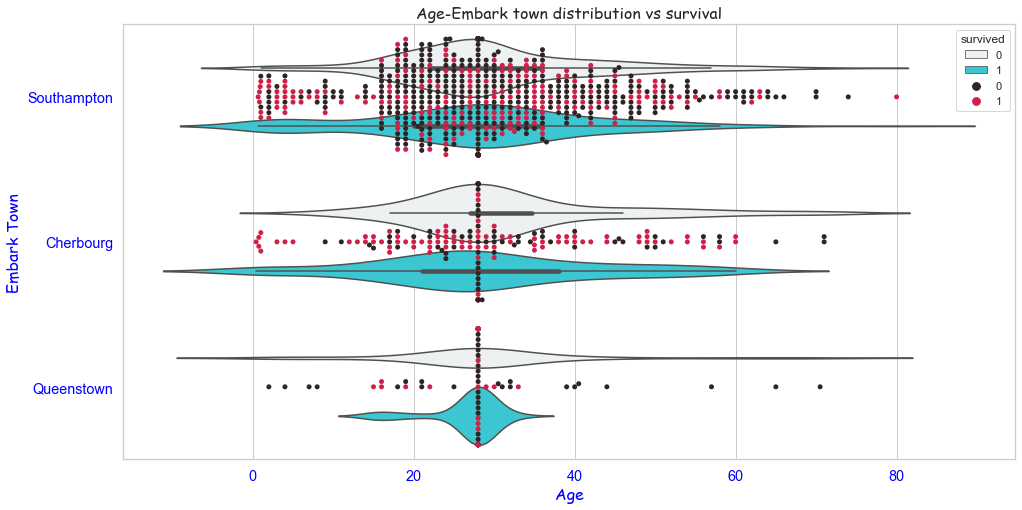

            Survived                Non-survived               
pclass             1   2    3 Total            1   2    3 Total
embark_town                                                    
Cherbourg         59   9   25    93           26   8   41    75
Queenstown         1   2   27    30            1   1   45    47
Southampton       74  76   67   217           53  88  286   427
Total            134  87  119   340           80  97  372   549


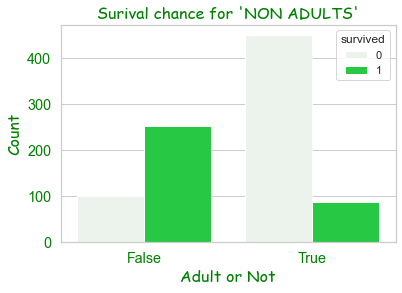

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=[16,8])
sns.violinplot(x="age",y="embark_town",data=df,hue="survived",color="#22DBEA")
sns.swarmplot(x="age",y="embark_town",data=df,hue="survived",color="#D02048")
plt.title("Age-Embark town distribution vs survival",fontdict={"fontname":"Comic Sans MS","fontsize":16})
plt.xlabel("Age",fontdict={"fontname":"Comic Sans MS","fontsize":16,"color":"blue"})
plt.tick_params(axis="both",labelsize="large",labelcolor="blue")
plt.ylabel("Embark Town", fontdict={"fontname":"Comic Sans MS","fontsize":16,"color":"blue"})
plt.show()
Keys2 = ["Survived", "Non-survived"]

print(pd.concat([pd.crosstab(Total_survivors.embark_town,Total_survivors.pclass,margins=True,margins_name="Total"),pd.crosstab(Total_Non_survived.embark_town,Total_Non_survived.pclass,margins=True,margins_name="Total")],axis=1,keys=Keys2))
sns.set(style="whitegrid")
sns.countplot(x=df.adult_male,hue=df.survived,color="#0CE433")
plt.title("Surival chance for 'NON ADULTS'",fontdict={"fontname":"Comic Sans MS","fontsize":16,"color":"green"})
plt.xlabel("Adult or Not",fontdict={"fontname":"Comic Sans MS","fontsize":16,"color":"green"})
plt.tick_params(axis="both",labelsize="large",labelcolor="green")
plt.ylabel("Count", fontdict={"fontname":"Comic Sans MS","fontsize":16,"color":"green"})
plt.show()

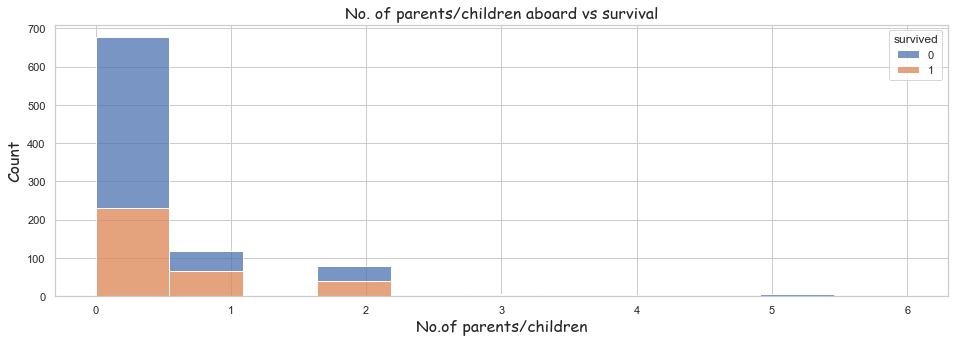

In [20]:
plt.figure(figsize=[16,5])
sns.histplot(data=df,x="parch",hue="survived",multiple="stack")
plt.title("No. of parents/children aboard vs survival",fontdict={"fontname":"Comic Sans MS","fontsize":16})
plt.xlabel("No.of parents/children",fontdict={"fontname":"Comic Sans MS","fontsize":16})
plt.ylabel("Count", fontdict={"fontname":"Comic Sans MS","fontsize":16})
plt.show()

Most of the passengers had no siblings/spouses on board. However, there was a higher probablity of survival if a passenger was travelling with one sibling/spouse.

survived,0,1,Total
sibsp,,,
0,398,208,606
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
Total,549,340,889


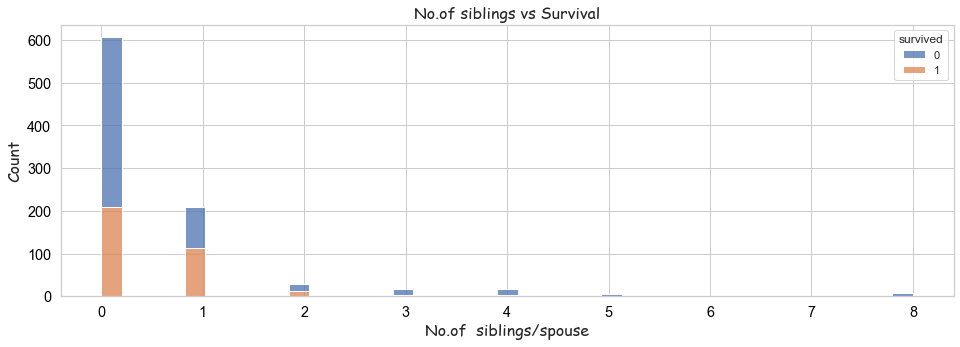

In [21]:
plt.figure(figsize=[16,5])
sns.histplot(data=df,x="sibsp",hue="survived",element="step",multiple="stack")
plt.title("No.of siblings vs Survival",fontdict={"fontname":"Comic Sans MS","fontsize":16})
plt.tick_params(axis="both",labelsize="large",labelcolor="black")
plt.xlabel("No.of  siblings/spouse",fontdict={"fontname":"Comic Sans MS","fontsize":16})
plt.ylabel("Count", fontdict={"fontname":"Comic Sans MS","fontsize":16})
pd.crosstab(df.sibsp,df.survived,margins=True,margins_name="Total")

In [22]:
df["sibsp"].corr(df["survived"])

-0.034039998796749

In [23]:
df["survived"].corr(df["parch"])

0.08315078366620238

In [24]:
df.parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

#### From the histogram below we can deduce that there is a higher probability of survival if one paid a higher amount of fare.

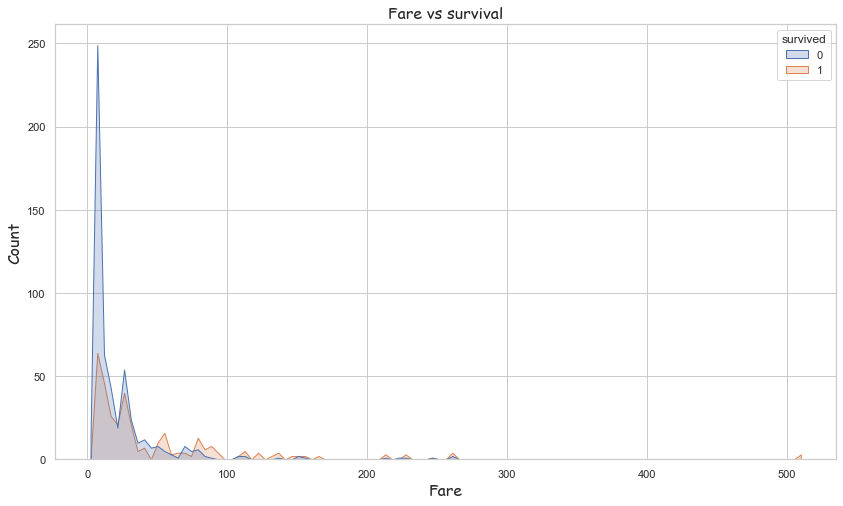

In [25]:
plt.figure(figsize=[14,8])
sns.histplot(x="fare",hue="survived",data=df,element="poly")
plt.title("Fare vs survival",fontdict={"fontname":"Comic Sans MS","fontsize":16})
plt.xlabel("Fare",fontdict={"fontname":"Comic Sans MS","fontsize":16})
plt.ylabel("Count", fontdict={"fontname":"Comic Sans MS","fontsize":16})
plt.show()

#### There is a higher chance of survival in the case when the traveller is NOT travelling ALONE.

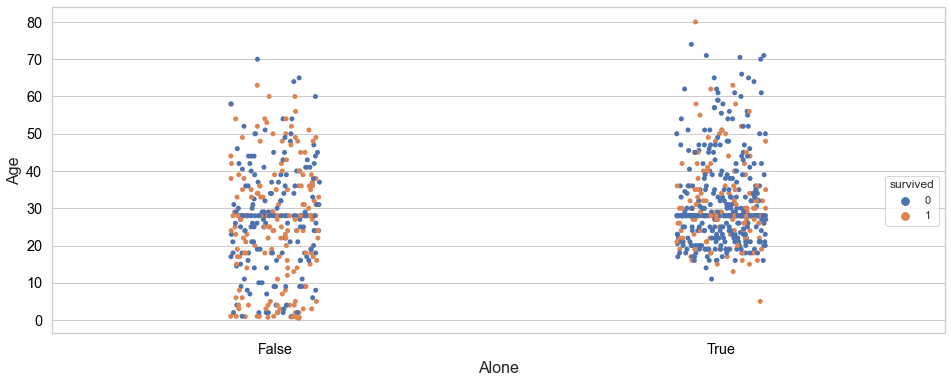

survived,0,1,Total
alone,,,
False,175,179,354
True,374,161,535
Total,549,340,889


In [26]:
plt.figure(figsize=[16,6])
sns.stripplot(data=df,x="alone",y= "age", hue="survived")
plt.tick_params(axis="both",labelsize="large",labelcolor="black")
plt.xlabel(xlabel="Alone", fontdict={"fontsize": 16})
plt.ylabel(ylabel="Age", fontdict={"fontsize": 16})
plt.legend(bbox_to_anchor=(1,0.5),title = "survived")
plt.show()

pd.crosstab(df.alone,df.survived,margins=True,margins_name="Total")

## Model creation for prediction

For the machine learning model, shall delete the ["embarked", "who", "embark_town", & alive"] columns and encode the rest of the categorical columns

In [27]:
df_new = df.drop(columns=["embarked", "who", "alive","embark_town"])

In [28]:
df_new

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,Third,True,False
1,1,1,female,38.0,1,0,71.2833,First,False,False
2,1,3,female,26.0,0,0,7.9250,Third,False,True
3,1,1,female,35.0,1,0,53.1000,First,False,False
4,0,3,male,35.0,0,0,8.0500,Third,True,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Second,True,True
887,1,1,female,19.0,0,0,30.0000,First,False,True
888,0,3,female,28.0,1,2,23.4500,Third,False,False
889,1,1,male,26.0,0,0,30.0000,First,True,True


In [29]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [30]:
Class = ["Third","Second","First"]

In [31]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [32]:
OD = OrdinalEncoder(categories=[Class])

In [33]:
df_new["Class_Encoded"] = OD.fit_transform(df_new[["class"]])

In [34]:
df_new = df_new.drop(columns=["class","pclass"])

In [35]:
df_final = pd.get_dummies(data=df_new,columns=["adult_male","sex","sibsp","parch","alone"],drop_first=True)

In [36]:
df_final.head()

,survived,age,fare,Class_Encoded,adult_male_True,sex_male,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,alone_True
0,0,22.0,7.2500,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,38.0,71.2833,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,35.0,8.0500,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
df_final.columns


Index(['survived', 'age', 'fare', 'Class_Encoded', 'adult_male_True',
       'sex_male', 'sibsp_1', 'sibsp_2', 'sibsp_3', 'sibsp_4', 'sibsp_5',
       'sibsp_8', 'parch_1', 'parch_2', 'parch_3', 'parch_4', 'parch_5',
       'parch_6', 'alone_True'],
      dtype='object')

In [38]:
df_final = df_final.drop(columns=['parch_3', 'parch_4', 'parch_5', 'parch_6', 'sibsp_3', 'sibsp_4', 'sibsp_5','sibsp_8'])

##### Splitting the final dataset into inputs(X) and outputs(y) and train/test sets

In [39]:
df_final.iloc[:,1:]

,age,fare,Class_Encoded,adult_male_True,sex_male,sibsp_1,sibsp_2,parch_1,parch_2,alone_True
0,22.0,7.2500,0.0,1,1,1,0,0,0,0
1,38.0,71.2833,2.0,0,0,1,0,0,0,0
2,26.0,7.9250,0.0,0,0,0,0,0,0,1
3,35.0,53.1000,2.0,0,0,1,0,0,0,0
4,35.0,8.0500,0.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1.0,1,1,0,0,0,0,1
887,19.0,30.0000,2.0,0,0,0,0,0,0,1
888,28.0,23.4500,0.0,0,0,1,0,0,1,0
889,26.0,30.0000,2.0,1,1,0,0,0,0,1


In [40]:
X = df_final.iloc[:,1:]
y = df_final.iloc[:,0]

In [41]:
X

,age,fare,Class_Encoded,adult_male_True,sex_male,sibsp_1,sibsp_2,parch_1,parch_2,alone_True
0,22.0,7.2500,0.0,1,1,1,0,0,0,0
1,38.0,71.2833,2.0,0,0,1,0,0,0,0
2,26.0,7.9250,0.0,0,0,0,0,0,0,1
3,35.0,53.1000,2.0,0,0,1,0,0,0,0
4,35.0,8.0500,0.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1.0,1,1,0,0,0,0,1
887,19.0,30.0000,2.0,0,0,0,0,0,0,1
888,28.0,23.4500,0.0,0,0,1,0,0,1,0
889,26.0,30.0000,2.0,1,1,0,0,0,0,1


#### The dataset is imbalanaced and hence SMOTE technique used to balance the  data (no. of survived & no. non survivors have been made equal) (NOT INITIATED)

In [42]:
#df_final.survived.value_counts()

In [43]:
#from imblearn.over_sampling import SMOTE

In [44]:
#SM = SMOTE(sampling_strategy="minority",k_neighbors=5)

In [45]:
#X_smote,y_smote = SM.fit_resample(X,y)

We can now notice that the survived individuals are now equal in count to the Non survivors.


In [46]:
#y_smote.value_counts()

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=100)

##### Converting our train and test sets into a standardised scale (standard normally distributed data i.e. Gaussian with 0 mean and unit variance)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
SC = StandardScaler()

In [51]:
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)


In [52]:
from sklearn.linear_model import LogisticRegression,LassoCV,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [53]:
def model(modeltype):
    
    model1 = modeltype()
    model1.fit(X_train,y_train)
    y_train_predict = model1.predict(X_train)
    y_test_predict = model1.predict(X_test)
    train_score = pd.DataFrame([accuracy_score(y_train,y_train_predict)],index=[modeltype()],columns=["Train Score"])
    test_score = pd.DataFrame([accuracy_score(y_test,y_test_predict)],index=[modeltype()],columns=["Test Score"])
    
    print(pd.concat([train_score,test_score],axis=1,))
    
    print("Confusion Matrix is:")
    Confusion_matrix = print(confusion_matrix(y_test,y_test_predict))
    
    print("Classification Report is:")
    Report = print(classification_report(y_test,y_test_predict))
    
    print("Cross Validation Score is:")
    Cross_Score = cross_val_score(modeltype(),X_train,y_train,cv=5)
    print(Cross_Score)
    
    print("Average Cross Validation Score is:", sum(Cross_Score)/len(Cross_Score))

###### Model Training with Logistic Regression

In [54]:
model(LogisticRegression)

                      Train Score  Test Score
LogisticRegression()      0.80872         NaN
LogisticRegression()          NaN    0.820225
Confusion Matrix is:
[[100  14]
 [ 18  46]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       114
           1       0.77      0.72      0.74        64

    accuracy                           0.82       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178

Cross Validation Score is:
[0.7972028  0.78873239 0.83802817 0.76760563 0.79577465]
Average Cross Validation Score is: 0.7974687284546439


###### Model Training with Decision Tree Classifier

In [55]:
model(DecisionTreeClassifier)

                          Train Score  Test Score
DecisionTreeClassifier()     0.983122         NaN
DecisionTreeClassifier()          NaN    0.825843
Confusion Matrix is:
[[98 16]
 [15 49]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       114
           1       0.75      0.77      0.76        64

    accuracy                           0.83       178
   macro avg       0.81      0.81      0.81       178
weighted avg       0.83      0.83      0.83       178

Cross Validation Score is:
[0.73426573 0.65492958 0.78873239 0.79577465 0.73943662]
Average Cross Validation Score is: 0.7426277947404708


###### Model Training with RandomForest Classifier

In [56]:
model(RandomForestClassifier,)

                          Train Score  Test Score
RandomForestClassifier()     0.983122         NaN
RandomForestClassifier()          NaN    0.814607
Confusion Matrix is:
[[101  13]
 [ 20  44]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       114
           1       0.77      0.69      0.73        64

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178

Cross Validation Score is:
[0.76223776 0.73943662 0.79577465 0.83802817 0.80985915]
Average Cross Validation Score is: 0.7890672707574116


###### Model Training with Ada Booster

In [57]:
model(AdaBoostClassifier)

                      Train Score  Test Score
AdaBoostClassifier()     0.841069         NaN
AdaBoostClassifier()          NaN    0.848315
Confusion Matrix is:
[[101  13]
 [ 14  50]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       114
           1       0.79      0.78      0.79        64

    accuracy                           0.85       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.85      0.85      0.85       178

Cross Validation Score is:
[0.77622378 0.78873239 0.79577465 0.8028169  0.84507042]
Average Cross Validation Score is: 0.8017236284841918


###### Model Training Gradient Boosting

In [58]:
model(GradientBoostingClassifier,)

                              Train Score  Test Score
GradientBoostingClassifier()     0.905767         NaN
GradientBoostingClassifier()          NaN    0.848315
Confusion Matrix is:
[[105   9]
 [ 18  46]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       114
           1       0.84      0.72      0.77        64

    accuracy                           0.85       178
   macro avg       0.85      0.82      0.83       178
weighted avg       0.85      0.85      0.85       178

Cross Validation Score is:
[0.77622378 0.79577465 0.8028169  0.83802817 0.85211268]
Average Cross Validation Score is: 0.8129912341179946


###### Model Training with Ridge Classifier

In [59]:
model(RidgeClassifier)

                   Train Score  Test Score
RidgeClassifier()     0.803094         NaN
RidgeClassifier()          NaN    0.820225
Confusion Matrix is:
[[101  13]
 [ 19  45]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       114
           1       0.78      0.70      0.74        64

    accuracy                           0.82       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178

Cross Validation Score is:
[0.7972028  0.79577465 0.82394366 0.78873239 0.78169014]
Average Cross Validation Score is: 0.7974687284546439


###### Model Training with K Nearest Neighbor

In [60]:
model(KNeighborsClassifier)

                        Train Score  Test Score
KNeighborsClassifier()     0.849508         NaN
KNeighborsClassifier()          NaN    0.808989
Confusion Matrix is:
[[104  10]
 [ 24  40]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       114
           1       0.80      0.62      0.70        64

    accuracy                           0.81       178
   macro avg       0.81      0.77      0.78       178
weighted avg       0.81      0.81      0.80       178

Cross Validation Score is:
[0.7972028  0.78169014 0.79577465 0.79577465 0.77464789]
Average Cross Validation Score is: 0.7890180242292918


###### Model Training with XGBoost

In [61]:
from xgboost import XGBClassifier

In [62]:
model(XGBClassifier)

[00:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
                                                    Train Score  Test Score
XGBClassifier(base_score=None, booster=None, co...     0.967651         NaN
XGBClassifier(base_score=None, booster=None, co...          NaN    0.825843
Confusion Matrix is:
[[102  12]
 [ 19  45]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       114
           1       0.79      0.70      0.74        64

    accuracy                           0.83       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.82      0.83      0.82       178

Cross Validation Score is:
[00:05:51] WARNING: C:/Users/Administr

# Hyper-parameter Tuning to the best model from above.
I have applied some hyper-parameter tuning techniques to DecisionTree Classifier,Gradient Boosting Classifier & RandomForest Classifier.

##### HyperParameter Tuning of Model for the DecisionTree clasifier.


In [63]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [64]:
criterion_DecisionTree = ["gini","entropy"]
splitter_DecisionTree = ["best", "random"]
min_samples_split_DecisionTree = [int(x) for x in np.linspace(start=2,stop=50,num=5)]
max_depth_DecisionTree = [int(x) for x in np.linspace(start=0,stop=20,num=10)]
max_features_DecisionTree = ["auto", "sqrt", "log2"]
ccp_alpha_DecisionTree = [0.0001,0.001,0.01,0.01,0.0]

In [65]:
Params_DecisionTree = {"criterion":criterion_DecisionTree,"splitter":splitter_DecisionTree,
                      "min_samples_split":min_samples_split_DecisionTree,"max_depth":max_depth_DecisionTree,
                       "max_features":max_features_DecisionTree,"ccp_alpha":ccp_alpha_DecisionTree}

In [66]:
Tree_Decision = DecisionTreeClassifier()
Rand_DecisionTree = RandomizedSearchCV(Tree_Decision,param_distributions=Params_DecisionTree,cv=8)
Decision_Tree_RandomCV = Rand_DecisionTree.fit(X_train,y_train)

In [67]:
Decision_Tree_RandomCV.best_params_

{'splitter': 'best',
 'min_samples_split': 26,
 'max_features': 'log2',
 'max_depth': 4,
 'criterion': 'gini',
 'ccp_alpha': 0.0}

In [68]:
def model_DecisionTree(modeltype):
    
    model1 = modeltype(splitter='best',min_samples_split=2,max_features='log2',max_depth=8,
                       criterion='gini',ccp_alpha=0.01)
    model1.fit(X_train,y_train)
    y_train_predict = model1.predict(X_train)
    y_test_predict = model1.predict(X_test)
    train_score = pd.DataFrame([accuracy_score(y_train,y_train_predict)],index=[modeltype()],columns=["Train Score"])
    test_score = pd.DataFrame([accuracy_score(y_test,y_test_predict)],index=[modeltype()],columns=["Test Score"])
    
    print(pd.concat([train_score,test_score],axis=1,))
    
    print("Confusion Matrix is:")
    Confusion_matrix = print(confusion_matrix(y_test,y_test_predict))
    
    print("Classification Report is:")
    Report = print(classification_report(y_test,y_test_predict))
    
    print("Cross Validation Score is:")
    Cross_Score = cross_val_score(modeltype(),X_train,y_train,cv=5)
    print(Cross_Score)
    
    print("Average Cross Validation Score is:", sum(Cross_Score)/len(Cross_Score))

In [69]:
model_DecisionTree(DecisionTreeClassifier,)

                          Train Score  Test Score
DecisionTreeClassifier()     0.793249         NaN
DecisionTreeClassifier()          NaN    0.808989
Confusion Matrix is:
[[105   9]
 [ 25  39]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       114
           1       0.81      0.61      0.70        64

    accuracy                           0.81       178
   macro avg       0.81      0.77      0.78       178
weighted avg       0.81      0.81      0.80       178

Cross Validation Score is:
[0.73426573 0.69014085 0.77464789 0.77464789 0.73943662]
Average Cross Validation Score is: 0.7426277947404707


### HyperParameter Tuning of Model for the Gradient Boosting clasifier.
Since the Gradient Boosting classifier had once of the highest accuracy (although also an overfit), I decided to do some hyperparameter tuning using RandomCV so as to better the score.

In [70]:
GradientBoostingClassifier()

GradientBoostingClassifier()

In [71]:
loss = ["deviance","exponential"]
learning_rate = [0.1,0.2]
n_estimators = [int(x) for x in np.linspace(start=100,stop=1000,num=3)]
subsample = [int(x) for x in np.linspace(start=1,stop=10,num=2)]
criterion = ["friedman_mse","mse"]
min_samples_split = [int(x) for x in np.linspace(start=2,stop=50,num=2)]
min_samples_leaf  = [int(x) for x in np.linspace(start=1,stop=20,num=2)]
max_depth = [int(x) for x in np.linspace(start=3,stop=30,num=2)]
random_state = [int(x) for x in np.linspace(start=50,stop=200,num=2)]
max_features = ["auto", "sqrt", "log2"]
ccp_alpha = [0.001,0.01]

In [72]:
grid_param_gradboost = {"loss":loss,"learning_rate":learning_rate,"n_estimators":n_estimators,
                       "subsample":subsample,"criterion":criterion,"min_samples_split":min_samples_split,
                       "min_samples_leaf":min_samples_leaf,"max_depth":max_depth,"random_state":random_state,
                       "max_features":max_features,"ccp_alpha":ccp_alpha}

In [76]:
Grd = GradientBoostingClassifier()
Grd_ran = GridSearchCV(Grd,param_grid=grid_param_gradboost,cv=8)
Boost_hyp = Grd_ran.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
Boost_hyp.best_params_

In [77]:
def model_GradientBoost(modeltype):
    
    model1 = modeltype(ccp_alpha=0.001,criterion='friedman_mse',learning_rate=0.2,loss='deviance',
                       max_depth=130,max_features='auto',min_samples_leaf=10,min_samples_split=2,
                       n_estimators=1000,random_state=100,subsample=1)
    model1.fit(X_train,y_train)
    y_train_predict = model1.predict(X_train)
    y_test_predict = model1.predict(X_test)
    train_score = pd.DataFrame([accuracy_score(y_train,y_train_predict)],index=[modeltype()],columns=["Train Score"])
    test_score = pd.DataFrame([accuracy_score(y_test,y_test_predict)],index=[modeltype()],columns=["Test Score"])
    
    print(pd.concat([train_score,test_score],axis=1,))
    
    print("Confusion Matrix is:")
    Confusion_matrix = print(confusion_matrix(y_test,y_test_predict))
    
    print("Classification Report is:")
    Report = print(classification_report(y_test,y_test_predict))
    
    print("Cross Validation Score is:")
    Cross_Score = cross_val_score(modeltype(),X_train,y_train,cv=5)
    print(Cross_Score)
    
    print("Average Cross Validation Score is:", sum(Cross_Score)/len(Cross_Score))

In [78]:
model_GradientBoost(GradientBoostingClassifier,)

                              Train Score  Test Score
GradientBoostingClassifier()     0.855134         NaN
GradientBoostingClassifier()          NaN    0.837079
Confusion Matrix is:
[[107   7]
 [ 22  42]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       114
           1       0.86      0.66      0.74        64

    accuracy                           0.84       178
   macro avg       0.84      0.80      0.81       178
weighted avg       0.84      0.84      0.83       178

Cross Validation Score is:
[0.77622378 0.79577465 0.8028169  0.83802817 0.85211268]
Average Cross Validation Score is: 0.8129912341179946


### HyperParameter Tuning of Model for the RandomForest clasifier.
Since the Gradient Boosting classifier had once of the highest accuracy (although also an overfit), I decided to do some hyperparameter tuning using RandomCV and then further with GridSearchCV so as to better the score.

In [187]:
n_estimators = [int(x) for x in  np.linspace(start=100,stop=2000,num=20)]
criterion = ["gini","enropy"]
max_depth = [int(x) for x in np.linspace(start=10,stop=150,num=10)]
min_samples_split = [int(x) for x in np.linspace(start=2,stop=50,num=5)]
max_features = ["auto", "sqrt", "log2"]
max_leaf_nodes = [int(x) for x in np.linspace(start=1,stop=10,num=2)]
random_state = [int(x) for x in np.linspace(start=50,stop=200,num=50)]
ccp_alpha = [0.0001,0.001,0.01,0.1]

In [188]:
grid_params_rtree = {"n_estimators":n_estimators,"criterion":criterion,"max_depth":max_depth,"min_samples_split":min_samples_split,
                    "max_features":max_features,"max_leaf_nodes":max_leaf_nodes,"random_state":random_state,"ccp_alpha":ccp_alpha}

In [87]:
TREE = RandomForestClassifier()
Rdn_grid = RandomizedSearchCV(TREE,param_distributions=grid_params_rtree,n_iter=20,cv=4)
Rdn_grid.fit(X_train,y_train)
Rdn_grid.best_params_

{'random_state': 65,
 'n_estimators': 1600,
 'min_samples_split': 38,
 'max_leaf_nodes': 10,
 'max_features': 'auto',
 'max_depth': 150,
 'criterion': 'gini',
 'ccp_alpha': 0.001}

In [95]:
Grid_params = {"n_estimators": [Rdn_grid.best_params_["random_state"]+10,Rdn_grid.best_params_["random_state"]+20,
                                Rdn_grid.best_params_["random_state"]+30,Rdn_grid.best_params_["random_state"]-10,
                                Rdn_grid.best_params_["random_state"]-20],
              "criterion": ["gini","entropy"],
              "min_samples_split": [Rdn_grid.best_params_["min_samples_split"]+10,
                                    Rdn_grid.best_params_["min_samples_split"]+20,
                                   Rdn_grid.best_params_["min_samples_split"]+30,
                                   Rdn_grid.best_params_["min_samples_split"]-10,
                                   Rdn_grid.best_params_["min_samples_split"]-20],
              "max_leaf_nodes": [Rdn_grid.best_params_["max_leaf_nodes"]+10,
                                Rdn_grid.best_params_["max_leaf_nodes"]+20,
                                Rdn_grid.best_params_["max_leaf_nodes"]+30,
                                Rdn_grid.best_params_["max_leaf_nodes"]-10,
                                Rdn_grid.best_params_["max_leaf_nodes"]-20],
              "max_features": ["auto", "sqrt", "log2"],
              "max_depth": [Rdn_grid.best_params_["max_depth"]+10,
                            Rdn_grid.best_params_["max_depth"]+20,
                            Rdn_grid.best_params_["max_depth"]+30,
                            Rdn_grid.best_params_["max_depth"]-10,
                            Rdn_grid.best_params_["max_depth"]-20]}
                            
                           

In [96]:
Grid_search = GridSearchCV(TREE,Grid_params,cv=8)
AA = Grid_search.fit(X_train,y_train)


In [97]:
AA.best_params_

{'criterion': 'gini',
 'max_depth': 130,
 'max_features': 'log2',
 'max_leaf_nodes': 40,
 'min_samples_split': 18,
 'n_estimators': 75}

##### Retraining the model RandomForest Classifier using the hyperparameters from above.

In [189]:
def model_RandomForest(modeltype):
    
    model1 = modeltype(criterion='gini',max_depth=130,max_features='log2',max_leaf_nodes=40,min_samples_split=18,n_estimators=75)
    model1.fit(X_train,y_train)
    y_train_predict = model1.predict(X_train)
    y_test_predict = model1.predict(X_test)
    train_score = pd.DataFrame([accuracy_score(y_train,y_train_predict)],index=[modeltype()],columns=["Train Score"])
    test_score = pd.DataFrame([accuracy_score(y_test,y_test_predict)],index=[modeltype()],columns=["Test Score"])
    
    print(pd.concat([train_score,test_score],axis=1,))
    
    print("Confusion Matrix is:")
    Confusion_matrix = print(confusion_matrix(y_test,y_test_predict))
    
    print("Classification Report is:")
    Report = print(classification_report(y_test,y_test_predict))
    
    print("Cross Validation Score is:")
    Cross_Score = cross_val_score(modeltype(),X_train,y_train,cv=5)
    print(Cross_Score)
    
    print("Average Cross Validation Score is:", sum(Cross_Score)/len(Cross_Score))

In [190]:
model_RandomForest(RandomForestClassifier,)

                          Train Score  Test Score
RandomForestClassifier()     0.877637         NaN
RandomForestClassifier()          NaN    0.842697
Confusion Matrix is:
[[107   7]
 [ 21  43]]
Classification Report is:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88       114
           1       0.86      0.67      0.75        64

    accuracy                           0.84       178
   macro avg       0.85      0.81      0.82       178
weighted avg       0.84      0.84      0.84       178

Cross Validation Score is:
[0.76223776 0.74647887 0.76056338 0.83802817 0.81690141]
Average Cross Validation Score is: 0.7848419186447355


# Conclusion

1)The Gradient Bosting Classifier seems to be the best classifer with the highest accuracy score (84%). However, we can notice that there was an overfit in the traning set which was reduced after hyperparameter tuning.
2)Although the accurracy scores for both the Gradient Bosting Classifier & RandomForest Classifier are the same, it is important to note that the Gradient Bosting Classifier had a higher Average accuracy score (81%) compared to the RandomForest classifer. 